In [33]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [34]:
df = pd.read_excel('final.xlsx')

In [35]:
df.shape

(6530, 2)

In [36]:
df.head()

,text,label
0,it's amazing that no matter how hard you try t...,1
1,It's quite heartbreaking to see some of my clo...,1
2,please stop telling me u love me- the words th...,1
3,Why do people say they know me when they don't...,1
4,You took a knife and stabbed it straight throu...,1


In [37]:
df.tail()

,text,label
6525,Boss are good,0
6526,What a knock!,0
6527,Effort while praying,0
6528,That’s my boy Leoooo,0
6529,Don't give up.,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530 entries, 0 to 6529
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6520 non-null   object
 1   label   6530 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 102.2+ KB


In [39]:
df.isnull().sum()

text     10
label     0
dtype: int64

In [40]:
df = df.dropna()

In [41]:
df.shape

(6520, 2)

shuffling the dataset 

In [42]:
df = df.sample(frac = 1)

/home/sherlocked/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

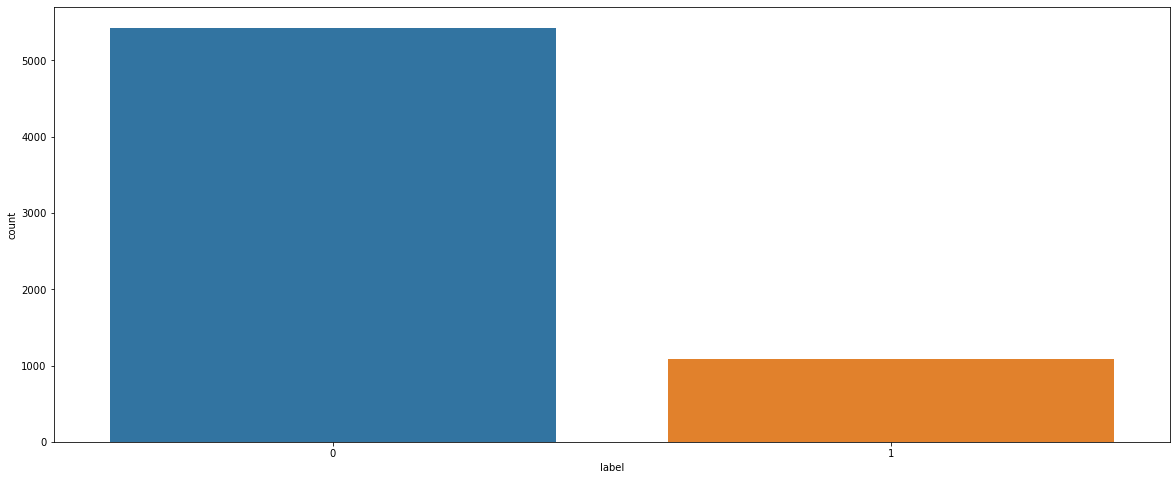

In [43]:
sns.countplot(df.label)

Preprocessing Text

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup

In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sherlocked/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

Contraction Mapping

In [54]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [57]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [58]:
df['cleaned'] = df["text"].apply(text_cleaner)

Visualizing WordCloud

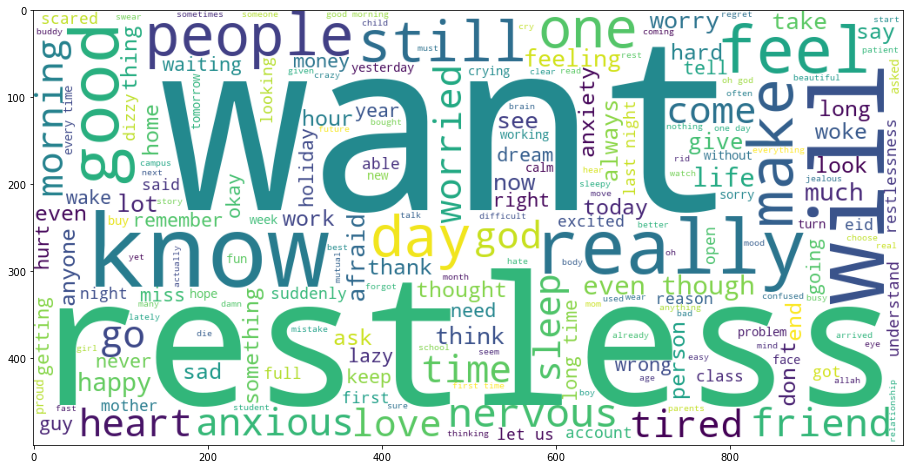

In [59]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [60]:
df.tail()

,text,label,cleaned
6141,"Fuck israeeli people, fuck israeel.",0,fuck israeeli people fuck israeel
1485,i love haknyeon,0,i love haknyeon
5517,I wasn't enough.,0,i was not enough
1442,why never thought there was a small portable a...,0,why never thought there was a small portable a...
5613,Whoever does not love then he will not be bles...,0,whoever does not love then he will not be bles...


Feature Extraction with CountVectorizer

In [61]:
X = df.cleaned
y = df.label

In [71]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [72]:
X_cv =vect.fit_transform(X).toarray()

In [73]:
X_cv.shape

(6520, 16231)

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

Model Performance Evaluation

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [84]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

<Figure size 720x432 with 0 Axes>

Logistic Regression

Accuracy : 0.9915644171779141

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1086
           1       1.00      0.95      0.97       218

    accuracy                           0.99      1304
   macro avg       0.99      0.97      0.98      1304
weighted avg       0.99      0.99      0.99      1304

   ------------ Confusion Matrix -------------- 


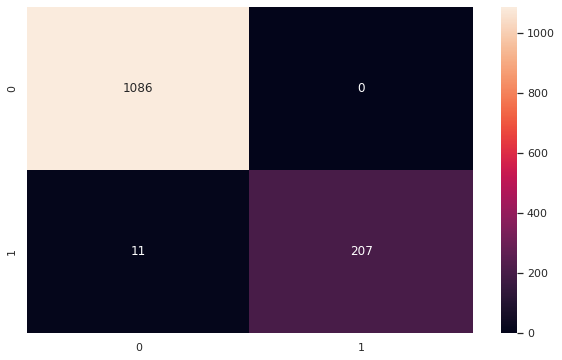

In [85]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

Naive Bayes

Accuracy : 0.9823619631901841

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1086
           1       0.91      0.99      0.95       218

    accuracy                           0.98      1304
   macro avg       0.96      0.98      0.97      1304
weighted avg       0.98      0.98      0.98      1304

   ------------ Confusion Matrix -------------- 


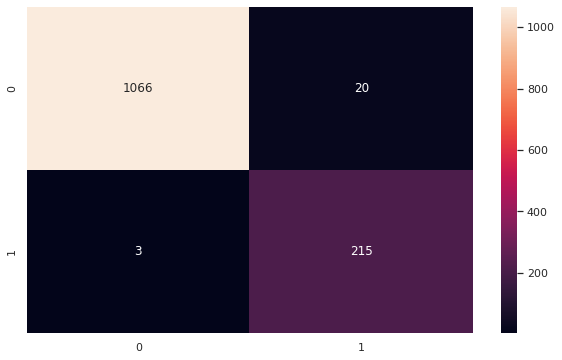

In [86]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

Decision Tree

Accuracy : 0.9923312883435583

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1086
           1       1.00      0.95      0.98       218

    accuracy                           0.99      1304
   macro avg       1.00      0.98      0.99      1304
weighted avg       0.99      0.99      0.99      1304

   ------------ Confusion Matrix -------------- 


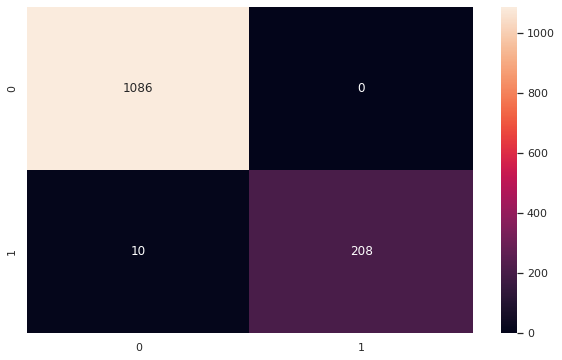

In [87]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

SVM

Accuracy : 0.9900306748466258

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1086
           1       0.99      0.95      0.97       218

    accuracy                           0.99      1304
   macro avg       0.99      0.97      0.98      1304
weighted avg       0.99      0.99      0.99      1304

   ------------ Confusion Matrix -------------- 


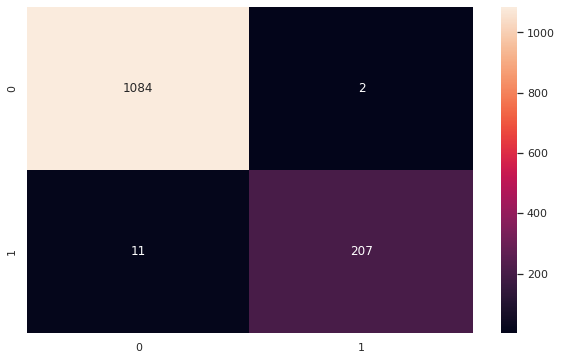

In [88]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

KNeighborsClassifier

Accuracy : 0.9118098159509203

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1086
           1       0.97      0.49      0.65       218

    accuracy                           0.91      1304
   macro avg       0.94      0.74      0.80      1304
weighted avg       0.92      0.91      0.90      1304

   ------------ Confusion Matrix -------------- 


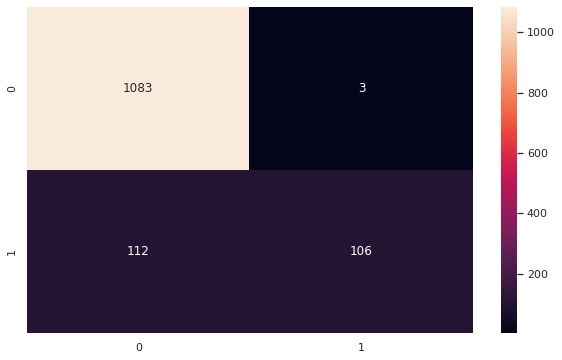

In [89]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

Adaboost Classifier

Accuracy : 0.977760736196319

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1086
           1       0.97      0.90      0.93       218

    accuracy                           0.98      1304
   macro avg       0.97      0.95      0.96      1304
weighted avg       0.98      0.98      0.98      1304

   ------------ Confusion Matrix -------------- 


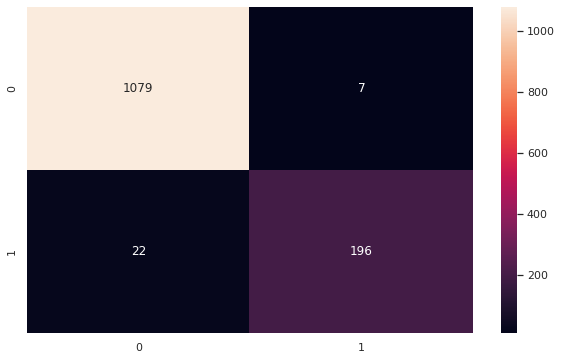

In [93]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

Random Forest

Accuracy : 0.9930981595092024

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1086
           1       1.00      0.96      0.98       218

    accuracy                           0.99      1304
   macro avg       1.00      0.98      0.99      1304
weighted avg       0.99      0.99      0.99      1304

   ------------ Confusion Matrix -------------- 


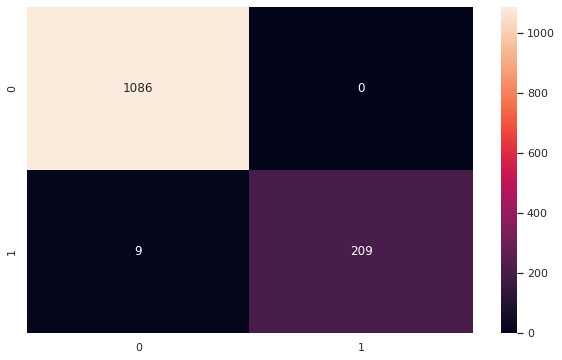

In [91]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

Ensemble

Accuracy : 0.9938650306748467

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1086
           1       1.00      0.96      0.98       218

    accuracy                           0.99      1304
   macro avg       1.00      0.98      0.99      1304
weighted avg       0.99      0.99      0.99      1304

   ------------ Confusion Matrix -------------- 


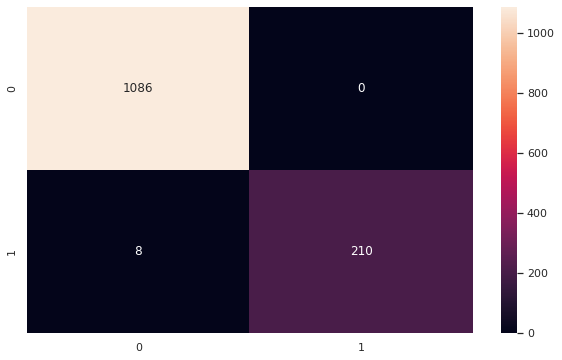

In [94]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('AdaBoost',clf_adb),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

Saving the Best Model

In [95]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

Checking for User Input

In [99]:
text = "I am / exhauted :) and restless."

In [100]:
clean_text = text_cleaner(text)

In [101]:
clean_text

'i am   exhauted    and restless '

In [103]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [106]:
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

Anxiety/Depression
